#HW06 Revisit IMDB/Reuters/Boston housing dataset

# IMDB Dataset : Binary Classification

1. Load the Dataset

In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.utils import pad_sequences
from keras import models
from keras import layers

top_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=top_words)

In [ ]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

number of train data : 25000
number of test data : 25000


2. EDA (Exploratory Data Analysis)

In [ ]:
len_result = [len(s) for s in train_data]

print('Max length of the review : {}'.format(np.max(len_result)))
print('Average length of the review : {}'.format(np.mean(len_result)))

Max length of the review : 2494
Average length of the review : 238.71364


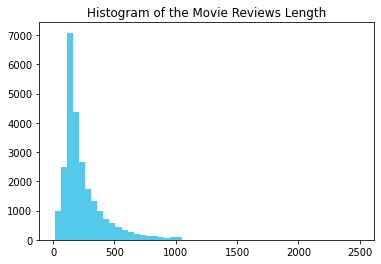

In [ ]:
plt.title('Histogram of the Movie Reviews Length')
plt.hist(len_result, bins=50, color='#54CAEA')
plt.show()

# 영화리뷰 데이터 길이 히스토그램
# 평균적으로 200자, 대부분의 리뷰는 500자 이내

In [ ]:
negative, positive = np.unique(train_labels, return_counts=True)

# Label - Positive : 1, Negative : 0

print("Number of Negative/Positive Reviews:")
print(np.asarray((negative, positive)))

# train data 의 긍정 리뷰 데이터와 부정 리뷰 데이터의 개수는 각 12,500개로 동일

Number of Negative/Positive Reviews:
[[    0     1]
 [12500 12500]]


3. One-Hot Encoding

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


## Experiment using 'LSTM'
LSTM 은 RNN 기반의 모델으로, RNN 보다 성능이 좋다. 숨겨진 노드에 추가로 들어오는 정보를 계속 흐를 수 있게 하는 기능을 추가해 시간이 오래 흘러도 학습 능력을 유지할 수 있다는 장점을 가지고 있다.
- activation function: sigmoid
- optimizer: Adam
- loss function: binary_crossentropy
- batch size: 64
- epoch: 5

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import models
from keras import layers

In [ ]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


Pad sequences

In [ ]:
import keras

x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.utils.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


Build Network

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

Epoch 1/5
782/782 [==============================] - 198s 249ms/step - loss: 0.4377 - accuracy: 0.7883 - val_loss: 0.3955 - val_accuracy: 0.8260
Epoch 2/5
782/782 [==============================] - 196s 251ms/step - loss: 0.2673 - accuracy: 0.8925 - val_loss: 0.3700 - val_accuracy: 0.8409
Epoch 3/5
782/782 [==============================] - 195s 249ms/step - loss: 0.1817 - accuracy: 0.9305 - val_loss: 0.4847 - val_accuracy: 0.8240
Epoch 4/5
782/782 [==============================] - 195s 250ms/step - loss: 0.1232 - accuracy: 0.9542 - val_loss: 0.4881 - val_accuracy: 0.8253
Epoch 5/5
782/782 [==============================] - 27s 34ms/step - loss: 0.6741 - accuracy: 0.8077


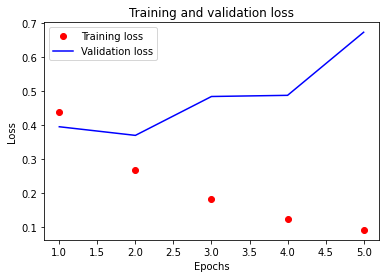

In [ ]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.6740928888320923
Test accuracy: 0.8077200055122375


#Reuters Dataset : Multi-Classification 

Load the Dataset

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000, test_split=0.2)
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

2110848/2110848 [==============================] - 0s 0us/step
number of train data : 8982
number of test data : 2246


2. EDA(Exploratory Data Analysis)

In [ ]:
len_result = [len(_) for _ in train_data]

print('Max length of the news article : {}'.format(np.max(len_result)))
print('Average length of the news article : {}'.format(np.mean(len_result)))

Max length of the news article : 2376
Average length of the news article : 145.5398574927633


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


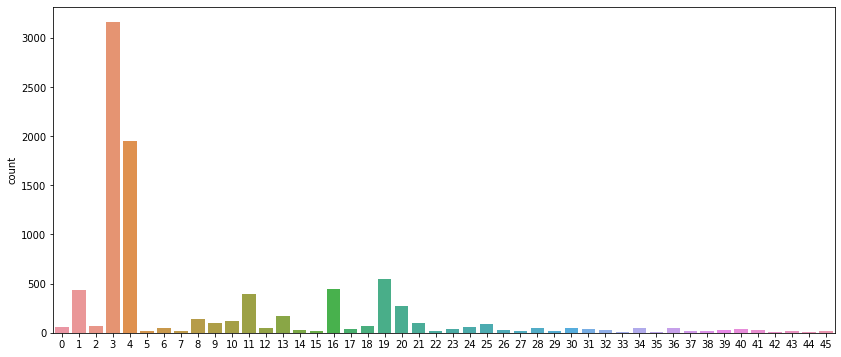

In [ ]:
import seaborn as sns
fig, _ = plt.subplots(ncols=1)
fig.set_size_inches(14,6)
sns.countplot(train_labels)

# 전체 뉴스 기사 중에서 총 46개의 뉴스 카테고리
#3번과 4번이 가장 많은 비중을 차지
# 따라서, 카테고리별로 데이터가 불균형

3. Pre-processing

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_val = vectorize_sequences(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical

# 레이블링된 카테고리 One-hot encoding 통해 Vectorize
y_train = to_categorical(train_labels)
y_val = to_categorical(test_labels)

## Experiment using 'Basic model + Dropout'
기본적인 neural network 에 Dropout 을 통해 오버피팅을 방지
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_crossentropy
- batch size: 32
- epoch: 15
- use dropout, rate=0.2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/50
36/36 [==============================] - 3s 38ms/step - loss: 0.9751 - acc: 0.4629 - val_loss: 0.8099 - val_acc: 0.5085
Epoch 2/50
36/36 [==============================] - 1s 31ms/step - loss: 0.6701 - acc: 0.5543 - val_loss: 0.5593 - val_acc: 0.6207
Epoch 3/50
36/36 [==============================] - 1s 31ms/step - loss: 0.5420 - acc: 0.6031 - val_loss: 0.5330 - val_acc: 0.6500
Epoch 4/50
36/36 [==============================] - 1s 30ms/step - loss: 0.5217 - acc: 0.6303 - val_loss: 0.5274 - val_acc: 0.6714
Epoch 5/50
36/36 [==============================] - 1s 31ms/step - loss: 0.5098 - acc: 0.6532 - val_loss: 0.5221 - val_acc: 0.6825
Epoch 6/50
36/36 [==============================] - 1s 31ms/step - loss: 0.4984 - acc: 0.6625 - val_loss: 0.5105 - val_acc: 0.6728
Epoch 7/50
36/36 [==============================] - 1s 30ms/step - loss: 0.4781 - acc: 0.6791 - val_loss: 0.5017 - val_acc: 0.6825
Epoch 8/50
36/36 [==============================] - 1s 31ms/step - loss: 0.4665 - a

In [ ]:
score, acc = model.evaluate(x_val, y_val, batch_size=batch_size)

71/71 [==============================] - 1s 7ms/step - loss: 0.4105 - acc: 0.7529


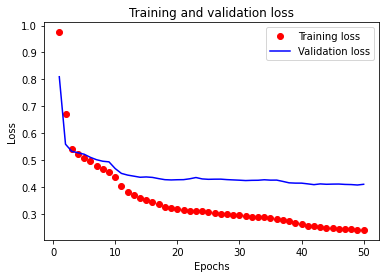

In [ ]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.4104507565498352
Test accuracy: 0.7528940439224243


# Boston Housing Dataset : Regression Problem

### 1. Load the Dataset

In [ ]:
import pandas as pd
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

57026/57026 [==============================] - 0s 0us/step
number of train data : 404
number of test data : 102


In [ ]:
order = np.argsort(np.random.random(train_labels.shape)) 
train_data = train_data[order] 
train_labels = train_labels[order]

In [ ]:
# train data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df1 = pd.DataFrame(train_data, columns=column_names) 
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92
1,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
2,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
3,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
4,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65


In [ ]:
# test data 의 열을 요인의 이름으로 바꾼다.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 

df2 = pd.DataFrame(test_data, columns=column_names) 
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [ ]:
# train data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
prices = ['MEDV']
df3 = pd.DataFrame(train_labels, columns=prices)
df3.head()

,MEDV
0,8.5
1,23.9
2,13.8
3,39.8
4,16.5


In [ ]:
# test data 의 레이블(주택 가격)을 MEDV 열로 바꾼다
df4 = pd.DataFrame(test_labels, columns=prices)
df4.head()

,MEDV
0,7.2
1,18.8
2,19.0
3,27.0
4,22.2


2. EDA (Exploratory Data Analysis)

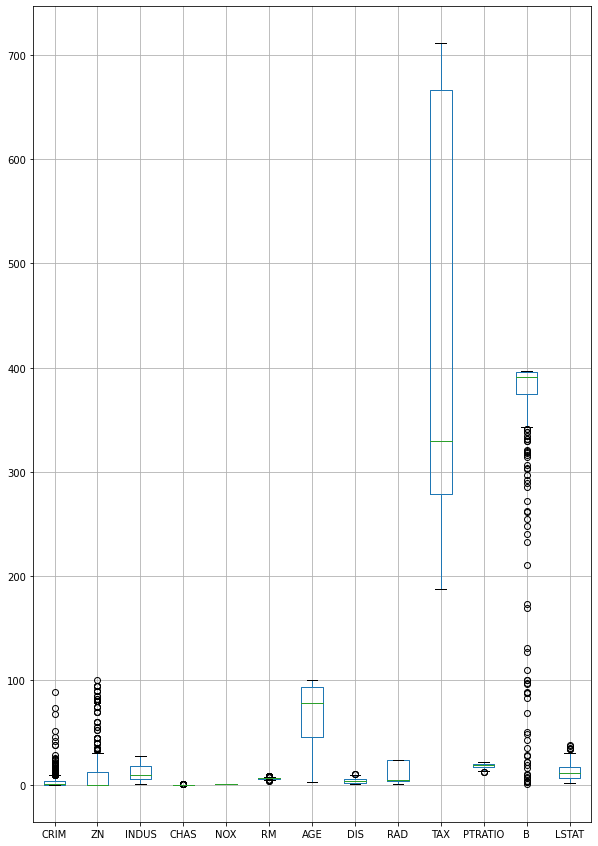

In [ ]:
# 13 factors - boxplot
df1.boxplot(figsize=(10,15))

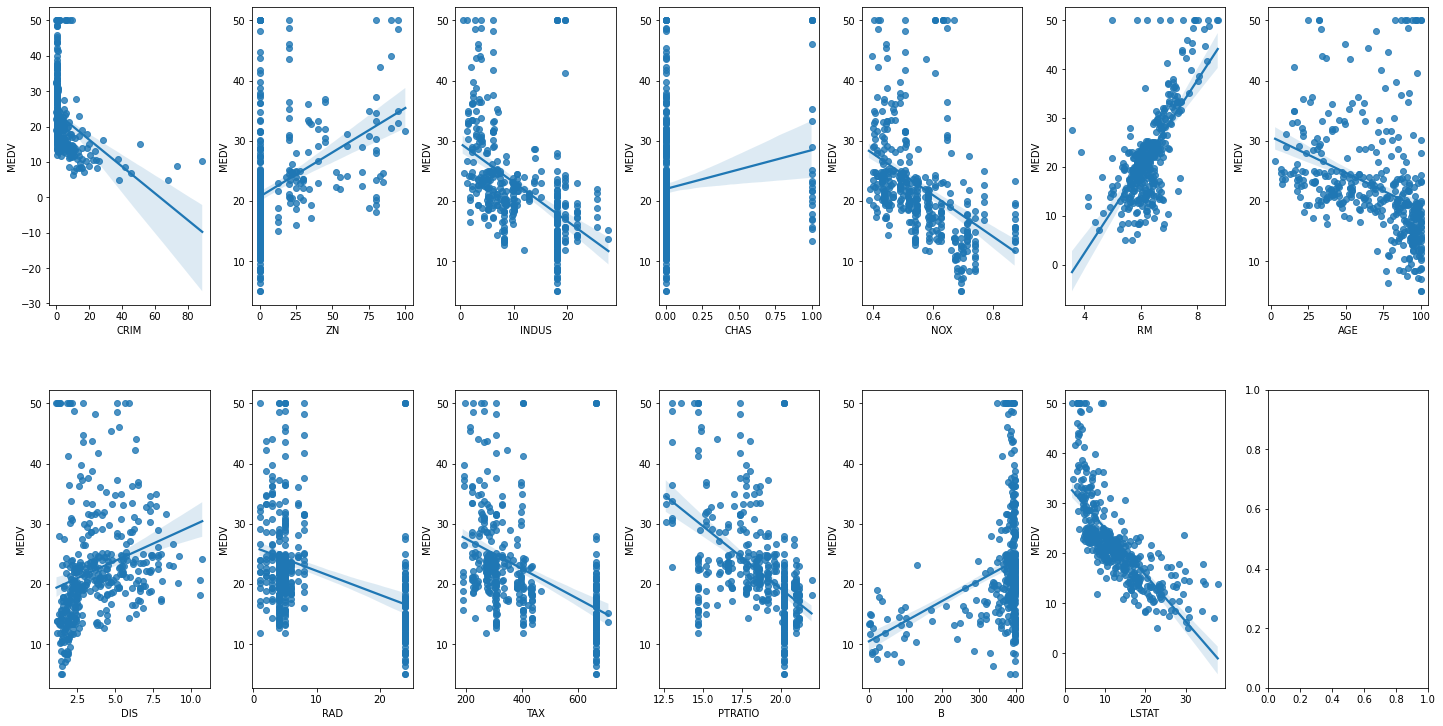

In [ ]:
# scatterplot을 통해 13가지 요인이 주택 가격과 어떤 상관 관계가 있는지 살펴본다.
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
x = df1.loc[:,column_sels]
y = df3['MEDV']
x = pd.DataFrame(data= x, columns=column_sels)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Experiments using 'Basic Model + Batch Normalization + Dropout'
기본적인 neural network 에 Dropout 과 Batch Normalization 을 통해 오버피팅을 방지해보자.
- activation function: relu
- optimizer: Adam
- loss function: mean_absolute_error
- batch size: 32
- epoch: 20
- use dropout, rate=0.2
- use batch normalization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

model = models.Sequential()
model.add(layers.Dense(26,activation='relu', input_shape=(13,)))
model.add(layers.Dense(26, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(26, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(26, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1)) # 예측(회귀)

In [ ]:
model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size = 32,
                    validation_data=(test_data, test_labels))

Epoch 1/20
13/13 [==============================] - 6s 118ms/step - loss: 22.5556 - accuracy: 0.0000e+00 - val_loss: 27.5550 - val_accuracy: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 22ms/step - loss: 22.0754 - accuracy: 0.0000e+00 - val_loss: 24.0624 - val_accuracy: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 21ms/step - loss: 21.4483 - accuracy: 0.0000e+00 - val_loss: 21.9585 - val_accuracy: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 20.9700 - accuracy: 0.0000e+00 - val_loss: 20.1091 - val_accuracy: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 13ms/step - loss: 20.3351 - accuracy: 0.0000e+00 - val_loss: 18.7893 - val_accuracy: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 19.4782 - accuracy: 0.0000e+00 - val_loss: 17.1321 - val_accuracy: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 18.3859 - accuracy: 0.

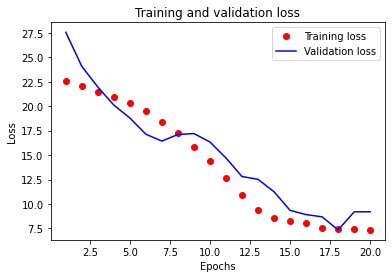

In [ ]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()